<a href="https://colab.research.google.com/github/Erman4u/IDS-Machine-Learning/blob/main/UNSW-NB15/UNSW-NB15-Klasifikasi-Multi-With-SMOTETomek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset NSL-KDD
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/UNSW_NB15_training-set.csv')
# Melihat beberapa baris data

print(train_data.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

#EDA

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
train_data.isnull().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
train_data.nunique()

,0
id,175341
dur,74039
proto,133
service,13
state,9
spkts,480
dpkts,443
sbytes,7214
dbytes,6660
rate,76991


In [ ]:
train_data.duplicated().sum()

np.int64(0)

In [ ]:
isi = train_data['attack_cat'].unique()
isi

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [ ]:
isi = isi[1:]
isi

array(['Backdoor', 'Analysis', 'Fuzzers', 'Shellcode', 'Reconnaissance',
       'Exploits', 'DoS', 'Worms', 'Generic'], dtype=object)

In [ ]:
train_data['attack_cat'] = train_data['attack_cat'].replace({
    'Normal': 0,
    'Fuzzers': 1, 'DoS': 2, 'Generic': 3,
    'Analysis': 4, 'Reconnaissance': 5,
    'Backdoor': 6, 'Worms': 7,
    'Exploits': 8, 'Shellcode': 9
}).astype(int)


/tmp/ipython-input-10-1351993262.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['attack_cat'] = train_data['attack_cat'].replace({


In [ ]:
train_data.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,0,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,0,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,0,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,0,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,0,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,0,0


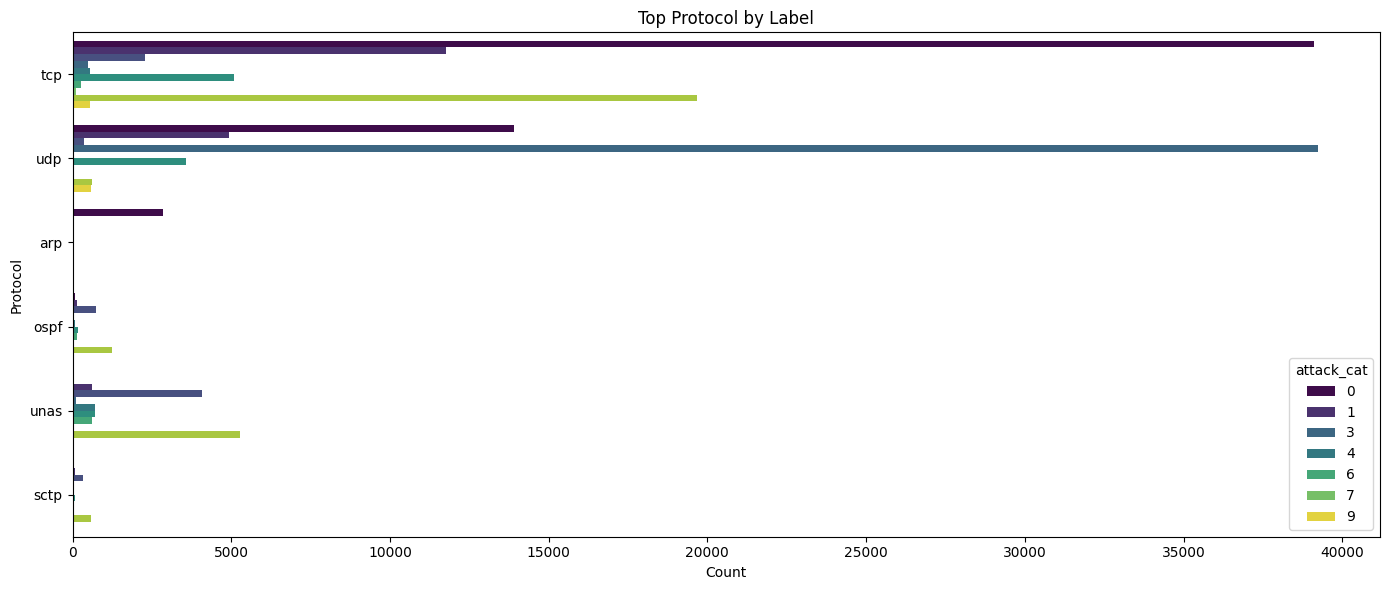

In [ ]:
# Hitung jumlah protokol
proto_counts = train_data['proto'].value_counts()
common_protos = proto_counts[proto_counts > 1000].index

# Filter data
filtered_data = train_data[train_data['proto'].isin(common_protos)]

# Plot ulang
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_data, y='proto', hue='attack_cat', palette='viridis')
plt.title('Top Protocol by Label')
plt.xlabel('Count')
plt.ylabel('Protocol')
plt.tight_layout()
plt.show()


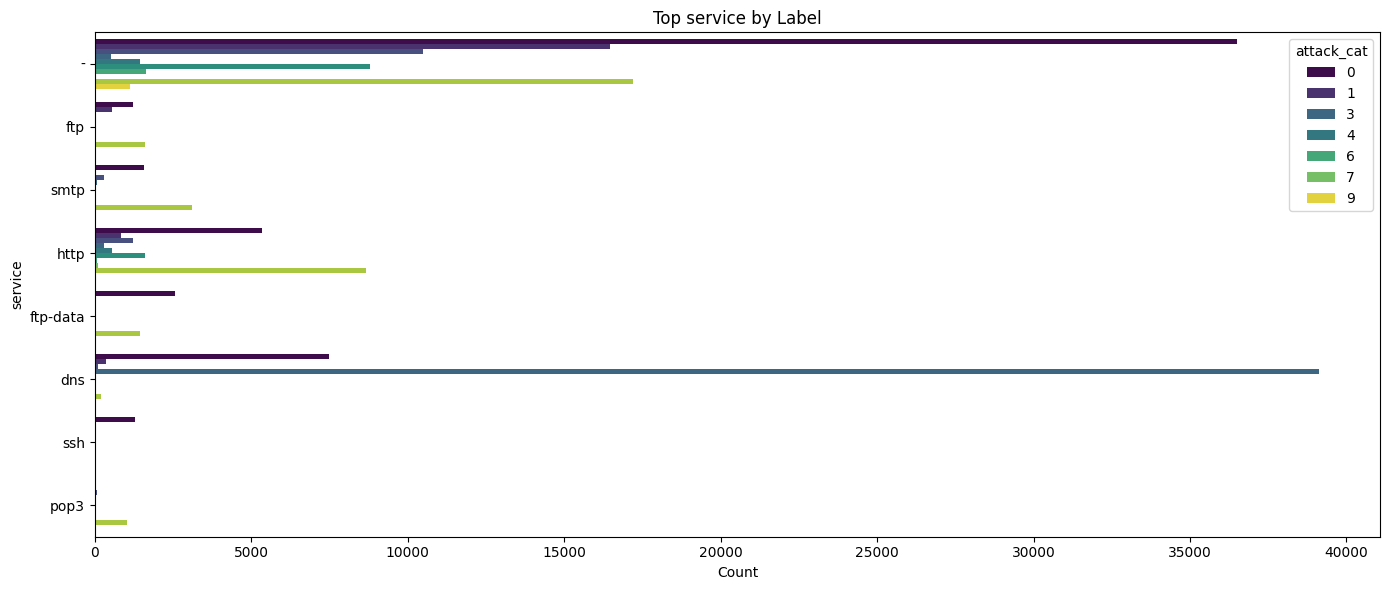

In [ ]:
# Hitung jumlah protokol
service_counts = train_data['service'].value_counts()
service_counts = service_counts[service_counts > 1000].index

# Filter data
filtered_data = train_data[train_data['service'].isin(service_counts)]

# Plot ulang
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_data, y='service', hue='attack_cat', palette='viridis')
plt.title('Top service by Label')
plt.xlabel('Count')
plt.ylabel('service')
plt.tight_layout()
plt.show()



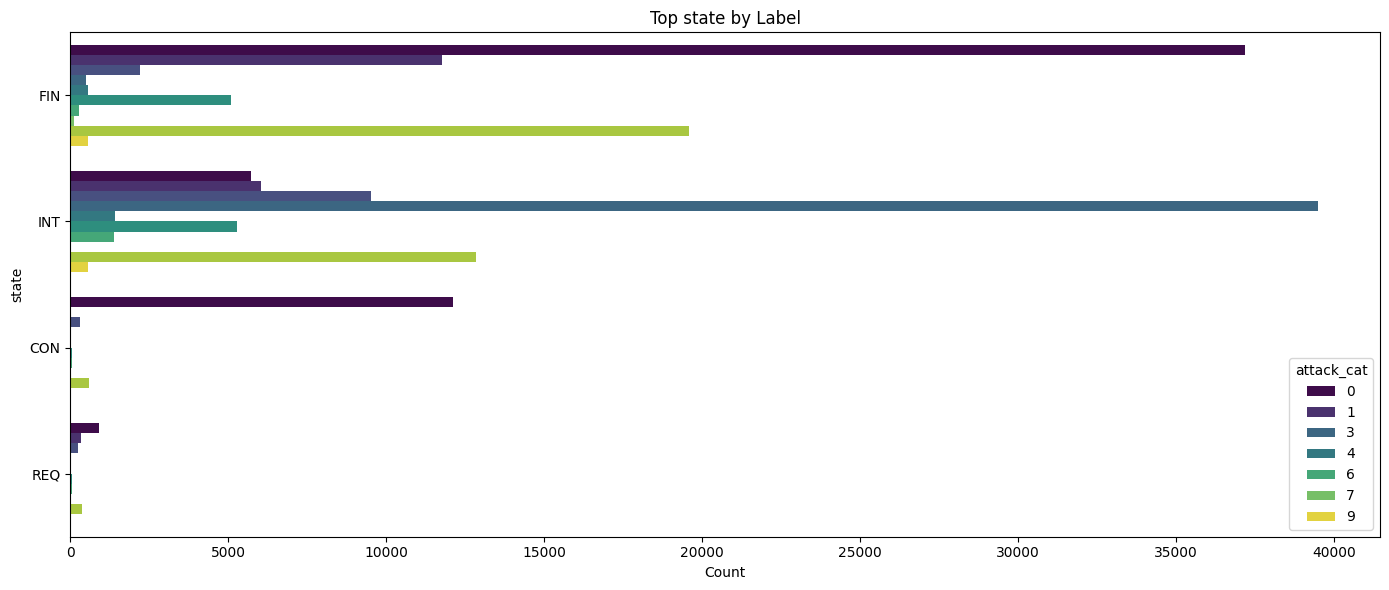

In [ ]:
# Hitung jumlah protokol
service_counts = train_data['state'].value_counts()
service_counts = service_counts[service_counts > 1000].index

# Filter data
filtered_data = train_data[train_data['state'].isin(service_counts)]

# Plot ulang
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_data, y='state', hue='attack_cat', palette='viridis')
plt.title('Top state by Label')
plt.xlabel('Count')
plt.ylabel('state')
plt.tight_layout()
plt.show()



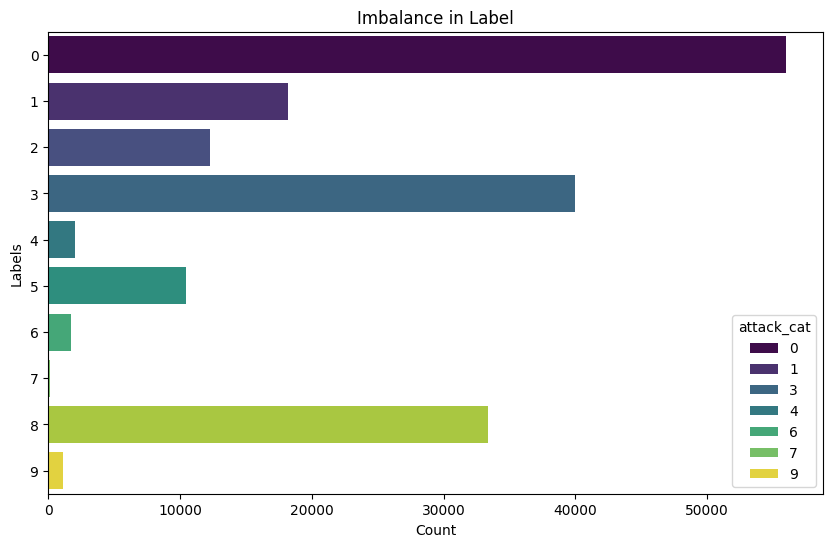

In [ ]:

# Plot imbalance data
plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['attack_cat'], hue=train_data['attack_cat'], palette="viridis")
plt.title("Imbalance in Label")
plt.xlabel("Count")
plt.ylabel("Labels")
plt.show()

In [ ]:
c = len(train_data.select_dtypes(include=["number"]).columns)
c

42

In [ ]:
col = [
    'id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
    'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
    'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
    'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
    'ct_srv_dst', 'is_sm_ips_ports'
]


In [ ]:
for col in train_data.select_dtypes(include=["object"]):
    print(col)

proto
service
state


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['proto','service','state']

for i in cols:
    en = LabelEncoder()

    train_data[i] = en.fit_transform(train_data[i])

In [ ]:
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,0,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,0,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,0,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,0,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,0,0


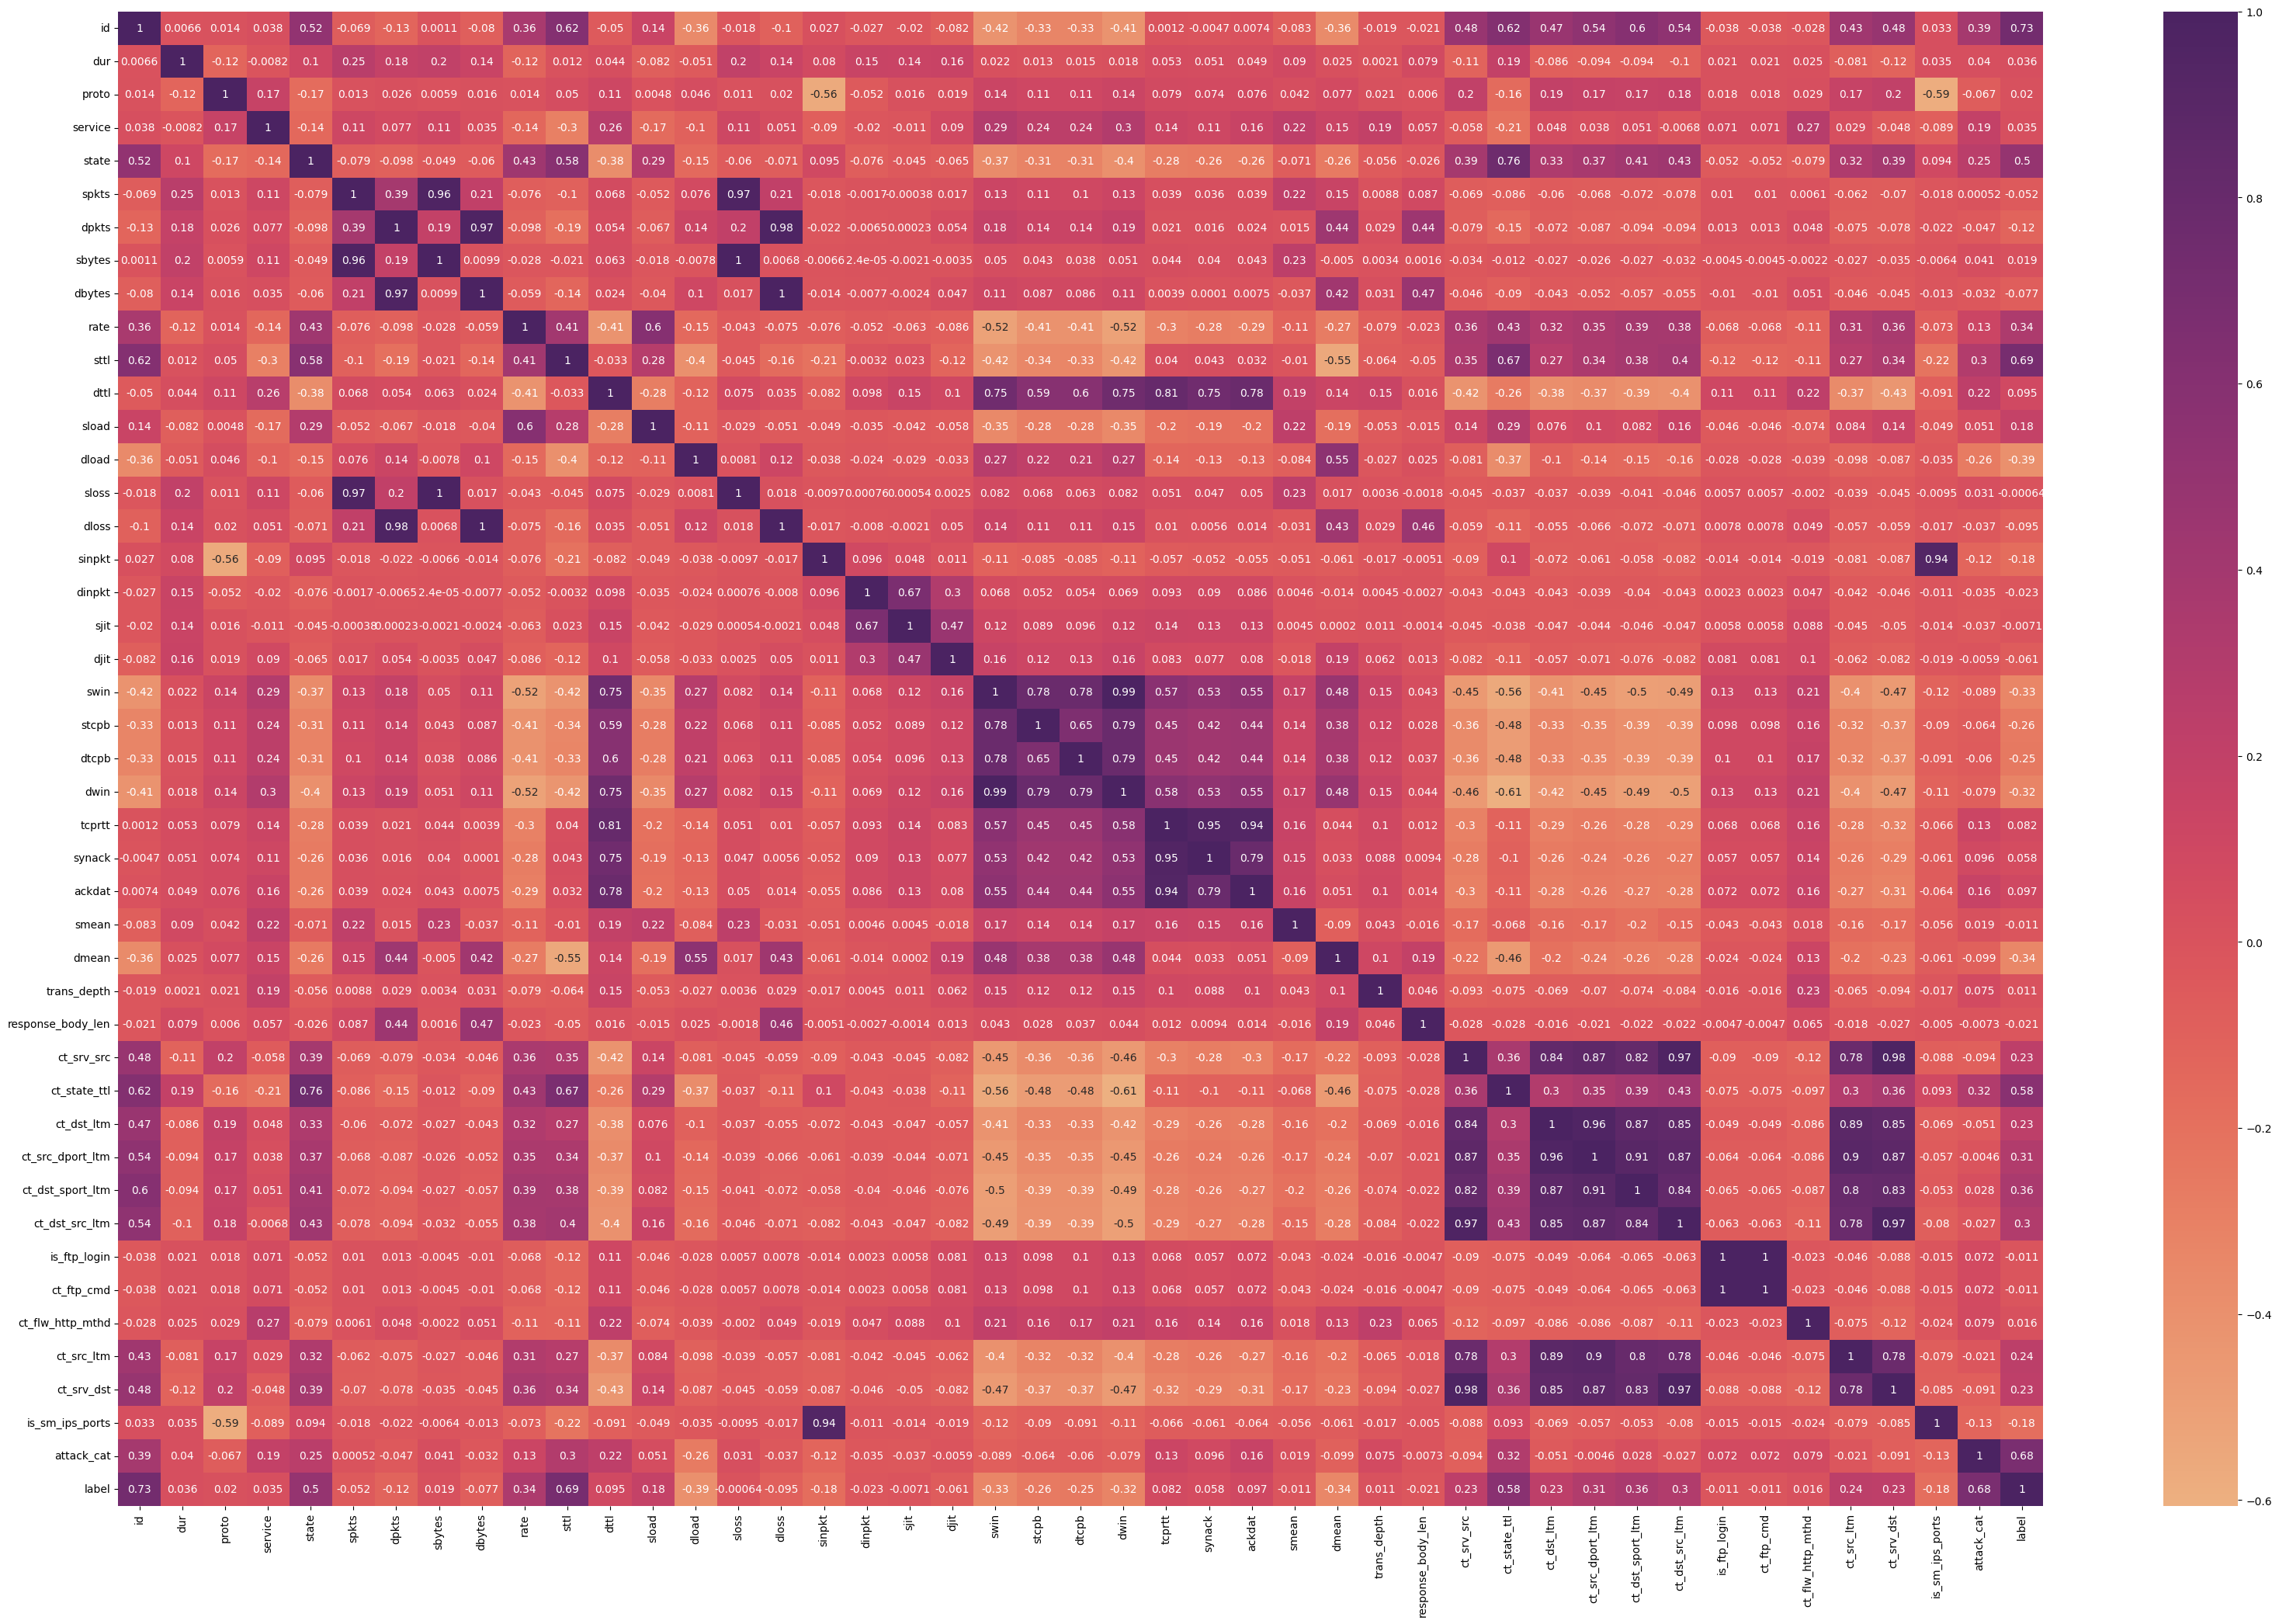

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(train_data.corr(),annot= True,cmap = 'flare')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Misal data Anda dalam dataframe X
correlation_matrix = train_data.corr()  # Default adalah Pearson


In [ ]:
# Create correlation matrix
corr_matrix = train_data.corr().abs()
corr_matrix

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,1.000000,0.006587,0.013943,0.038238,0.518446,0.068827,0.126316,0.001104,0.080283,0.364575,...,0.601158,0.539093,0.037636,0.037636,0.028287,0.425396,0.480899,0.033142,0.387600,0.727173
dur,0.006587,1.000000,0.124502,0.008234,0.103443,0.254559,0.181182,0.199731,0.144134,0.120966,...,0.093923,0.101760,0.020641,0.020641,0.024743,0.080871,0.115336,0.035370,0.039656,0.036175
proto,0.013943,0.124502,1.000000,0.170032,0.172441,0.013469,0.026439,0.005920,0.015812,0.013924,...,0.165796,0.175708,0.018003,0.018003,0.028809,0.168121,0.198594,0.585941,0.066741,0.020267
service,0.038238,0.008234,0.170032,1.000000,0.144978,0.114403,0.077338,0.105188,0.035492,0.141709,...,0.051106,0.006774,0.071051,0.071051,0.266206,0.028599,0.048011,0.088847,0.187995,0.035052
state,0.518446,0.103443,0.172441,0.144978,1.000000,0.078701,0.098268,0.049300,0.059759,0.432307,...,0.408662,0.429906,0.051970,0.051970,0.078856,0.323019,0.387446,0.094198,0.247880,0.497685
spkts,0.068827,0.254559,0.013469,0.114403,0.078701,1.000000,0.390067,0.963791,0.206609,0.076358,...,0.072484,0.077553,0.009951,0.009951,0.006084,0.061584,0.069598,0.017770,0.000520,0.052178
dpkts,0.126316,0.181182,0.026439,0.077338,0.098268,0.390067,1.000000,0.188476,0.971907,0.098202,...,0.094267,0.094085,0.013491,0.013491,0.047974,0.075190,0.078342,0.021765,0.047343,0.118591
sbytes,0.001104,0.199731,0.005920,0.105188,0.049300,0.963791,0.188476,1.000000,0.009926,0.028468,...,0.027281,0.032061,0.004515,0.004515,0.002185,0.027479,0.034553,0.006367,0.041200,0.018576
dbytes,0.080283,0.144134,0.015812,0.035492,0.059759,0.206609,0.971907,0.009926,1.000000,0.059475,...,0.056901,0.054633,0.010460,0.010460,0.051403,0.045594,0.044531,0.013147,0.031972,0.076871
rate,0.364575,0.120966,0.013924,0.141709,0.432307,0.076358,0.098202,0.028468,0.059475,1.000000,...,0.390721,0.383094,0.068140,0.068140,0.109297,0.310876,0.362883,0.072948,0.128039,0.337979


In [ ]:
print("Kolom yang tersedia dalam dataset:")
print(train_data.columns.tolist())

columns_to_drop = [
   'sbytes','proto','trans_depth', 'sloss', 'trans_depth','sjit', 'dinpkt','is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'response_body_len', 'djit', 'tcprtt', 'dinpkt', 'ackdat', 'label']

td_cleaned = train_data.drop(columns=columns_to_drop, errors='ignore')

print("\nKolom setelah dihapus:")
print(td_cleaned.columns.tolist())

Kolom yang tersedia dalam dataset:
['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

Kolom setelah dihapus:
['id', 'dur', 'service', 'state', 'spkts', 'dpkts', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'swin', 'stcpb', 'dtcpb', 'dwin', 'synack', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']


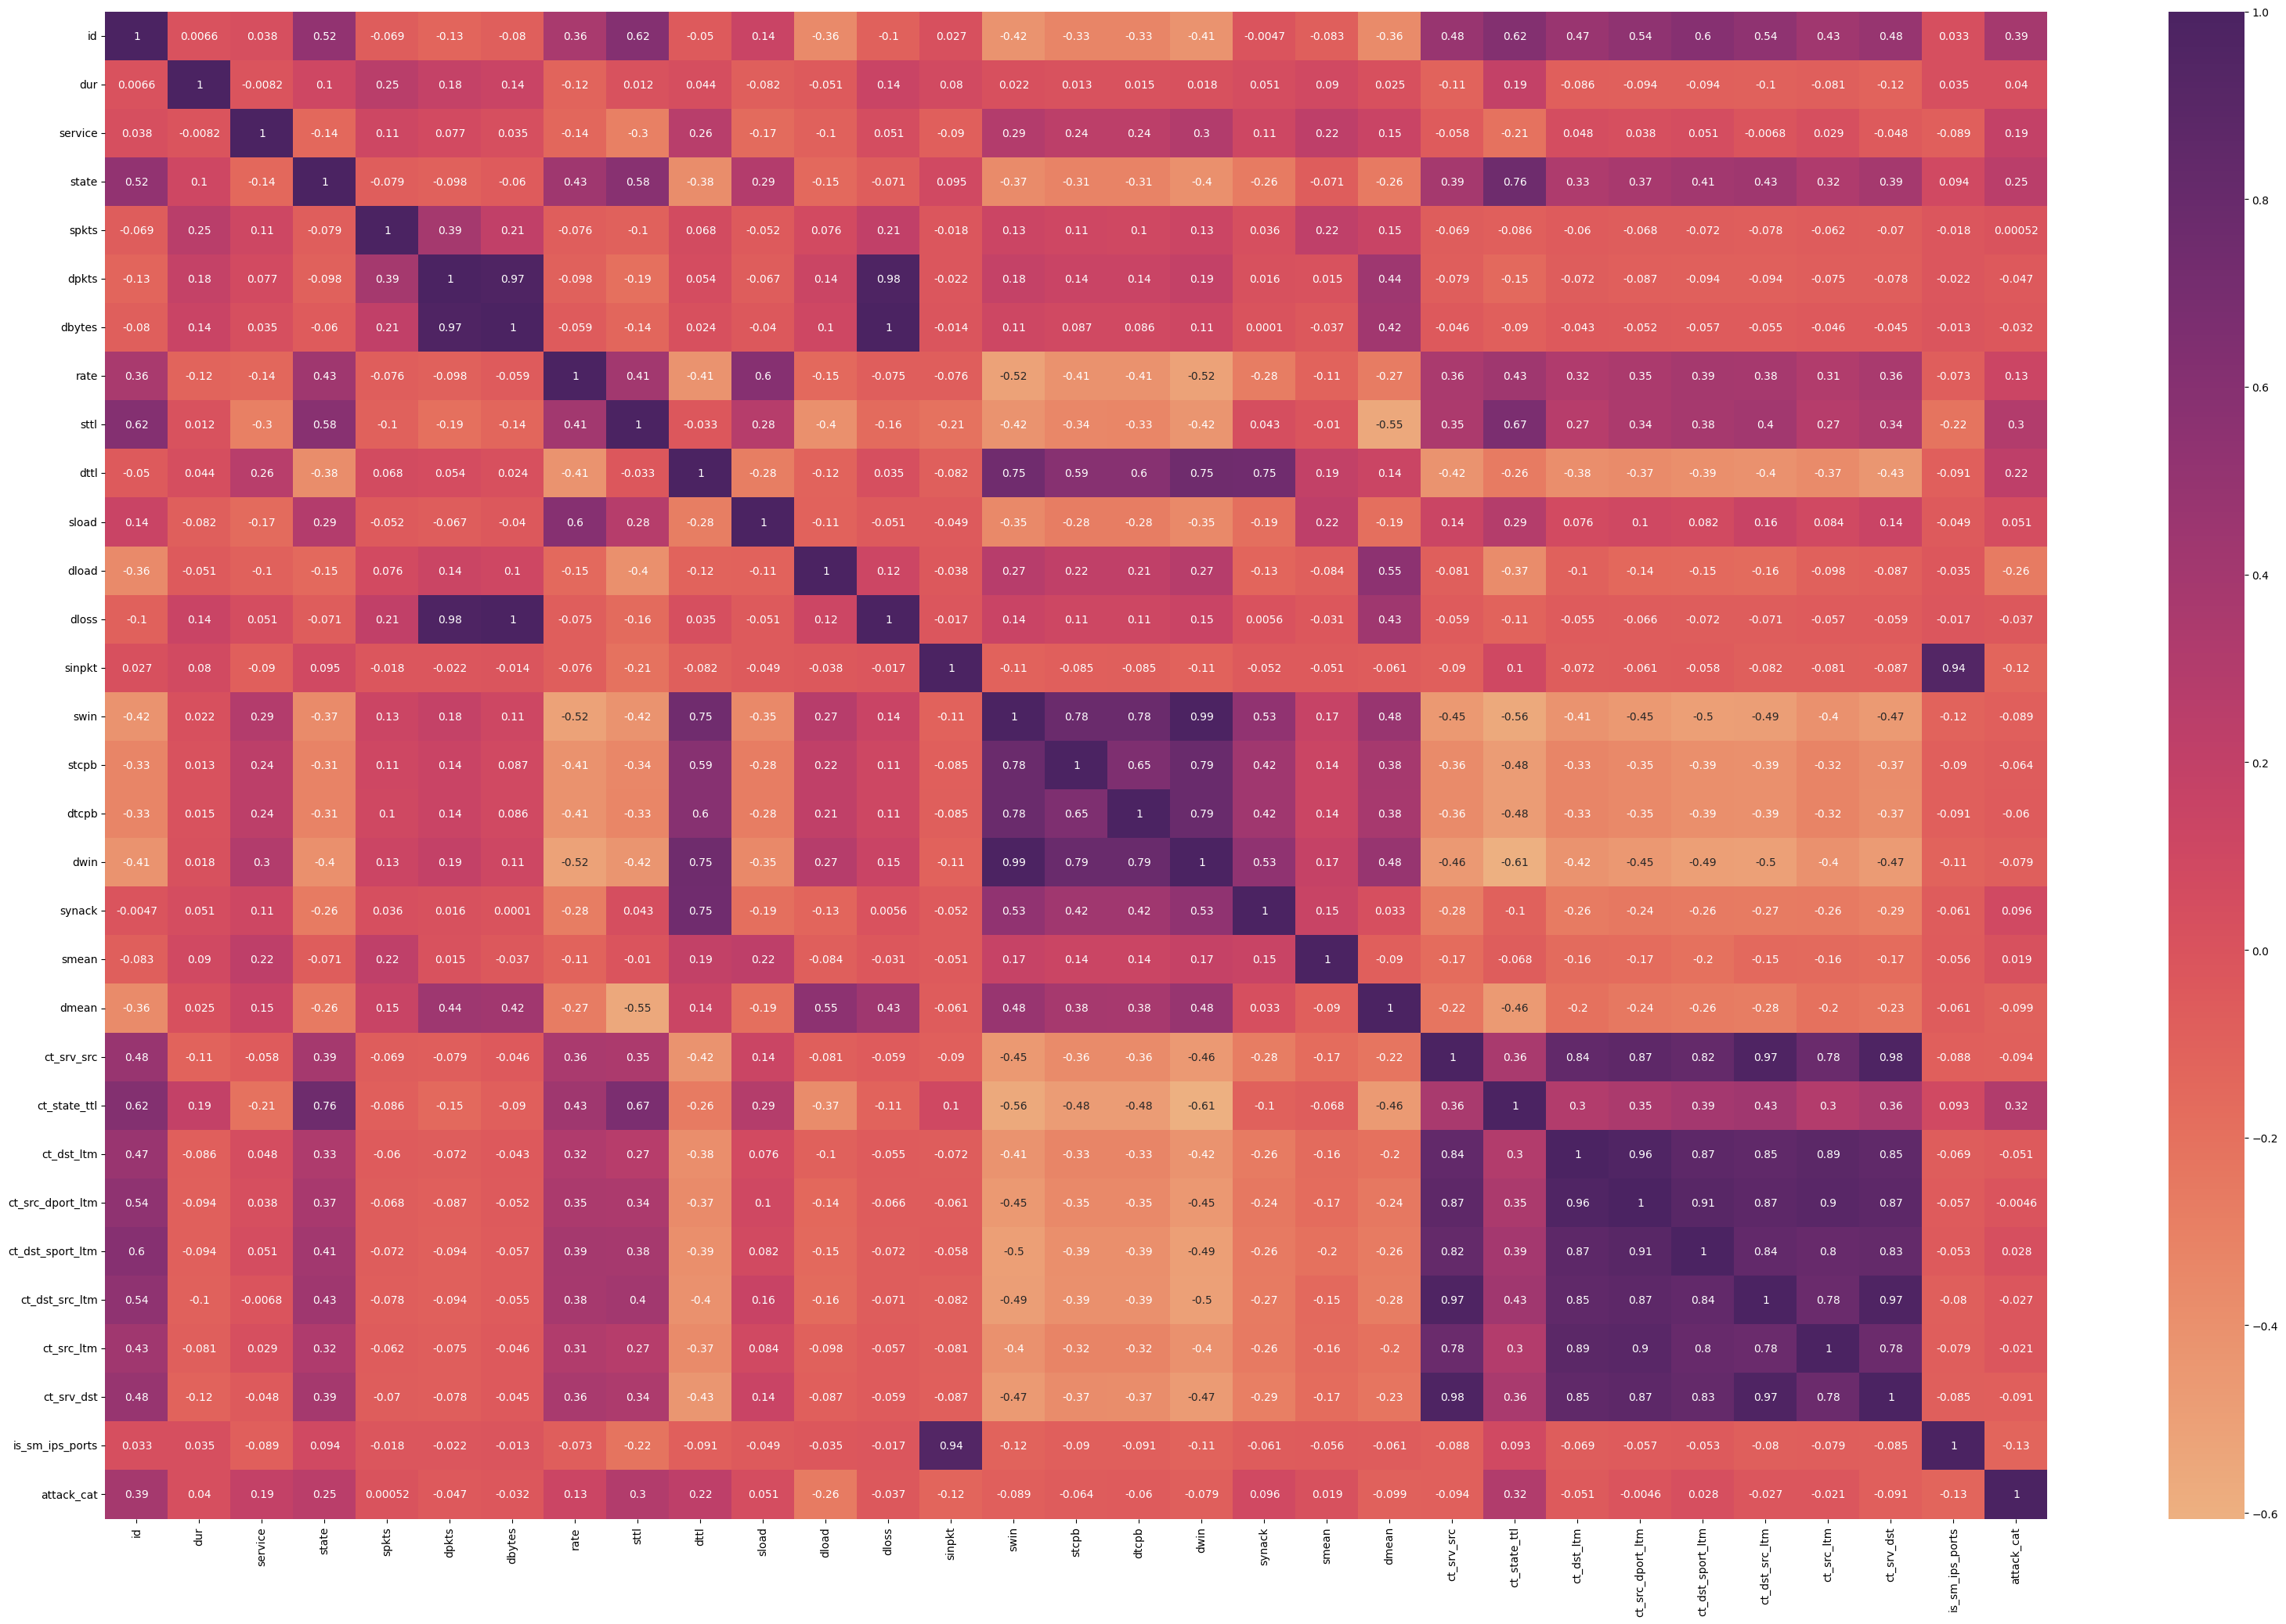

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(td_cleaned.corr(),annot= True,cmap = 'flare')
plt.show()

#Scaling Data

In [ ]:
X_trn = td_cleaned.drop(['attack_cat'] , axis = 1).values
Y_trn = td_cleaned['attack_cat'].values

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

X_trn = scaler.fit_transform(X_trn)

In [ ]:
X_trn.shape


(175341, 30)

In [ ]:
from sklearn.model_selection import train_test_split


#BAGI DATA

In [ ]:
x_trn, x_tst, y_trn, y_tst = train_test_split(X_trn, Y_trn, test_size = 0.20)

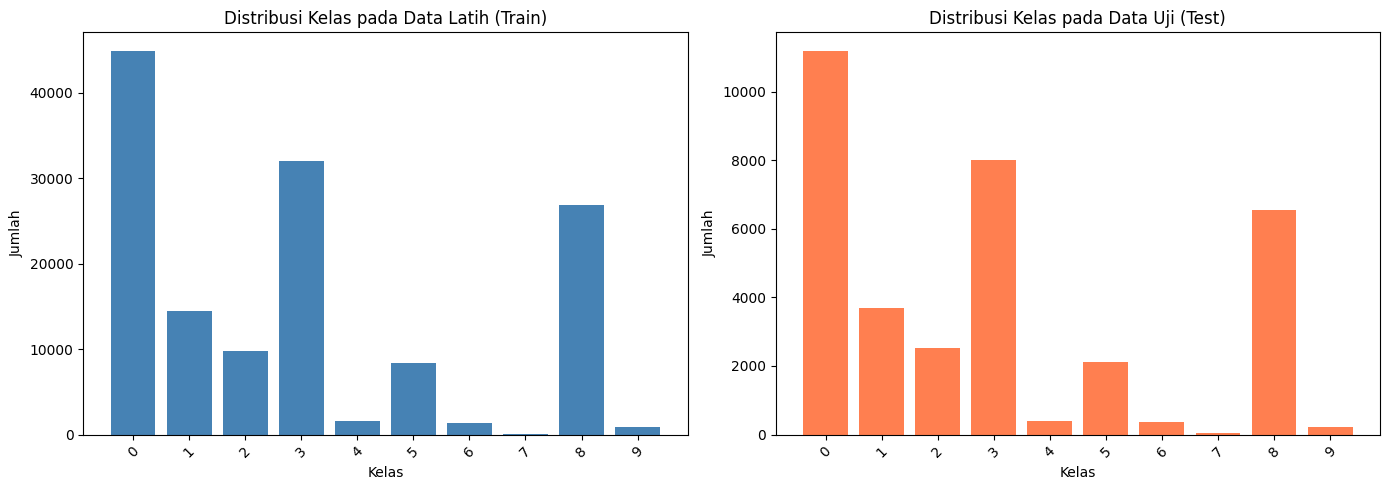

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ubah ke Series
y_trn_series = pd.Series(y_trn)
y_tst_series = pd.Series(y_tst)

# Hitung distribusi label
train_counts = y_trn_series.value_counts().sort_index()
test_counts = y_tst_series.value_counts().sort_index()

# Buat subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Visualisasi distribusi data latih
axes[0].bar(train_counts.index.astype(str), train_counts.values, color='steelblue')
axes[0].set_title('Distribusi Kelas pada Data Latih (Train)')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi distribusi data uji
axes[1].bar(test_counts.index.astype(str), test_counts.values, color='coral')
axes[1].set_title('Distribusi Kelas pada Data Uji (Test)')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#SAMPLING


In [ ]:
from collections import Counter
print(Counter(y_trn))


Counter({np.int64(0): 44830, np.int64(3): 31995, np.int64(8): 26835, np.int64(1): 14480, np.int64(2): 9745, np.int64(5): 8389, np.int64(4): 1607, np.int64(6): 1373, np.int64(9): 921, np.int64(7): 97})


In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter # Make sure Counter is imported if not already

# Manual sampling strategy: target classes with low counts
# Let's aim to balance the low-count classes to a slightly higher number, e.g., around 5000,
# without affecting the larger classes significantly.
# Adjust these numbers based on your desired balance.
sampling_strategy_manual = {
    0: 44892, # Keep majority class as is
    1: 14509, # Keep this class as is
    2: 15000,  # Increase sampling for class 2 to 15000
    3: 37852, # Keep this class as is
    4: 7000,  # Resample this low-count class
    5: 8407,  # Keep this class as is
    6: 10000,  # Keep class 6 at the increased level
    7: 10000,  # Keep class 7 at the increased level
    8: 29899, # Keep this class as is
    9: 7000   # Resample this low-count class
}


smote_tomek = SMOTETomek(sampling_strategy=sampling_strategy_manual,
 random_state=42)
x_resampled, y_resampled = smote_tomek.fit_resample(x_trn, y_trn)

print("Before:", Counter(y_trn))
print("After:", Counter(y_resampled))

Before: Counter({np.int64(0): 44830, np.int64(3): 31995, np.int64(8): 26835, np.int64(1): 14480, np.int64(2): 9745, np.int64(5): 8389, np.int64(4): 1607, np.int64(6): 1373, np.int64(9): 921, np.int64(7): 97})
After: Counter({np.int64(0): 43847, np.int64(3): 37637, np.int64(8): 25482, np.int64(1): 12411, np.int64(2): 10714, np.int64(7): 9989, np.int64(6): 8888, np.int64(9): 6917, np.int64(5): 6699, np.int64(4): 5933})


/tmp/ipython-input-42-3476867882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_resampled, palette="viridis")


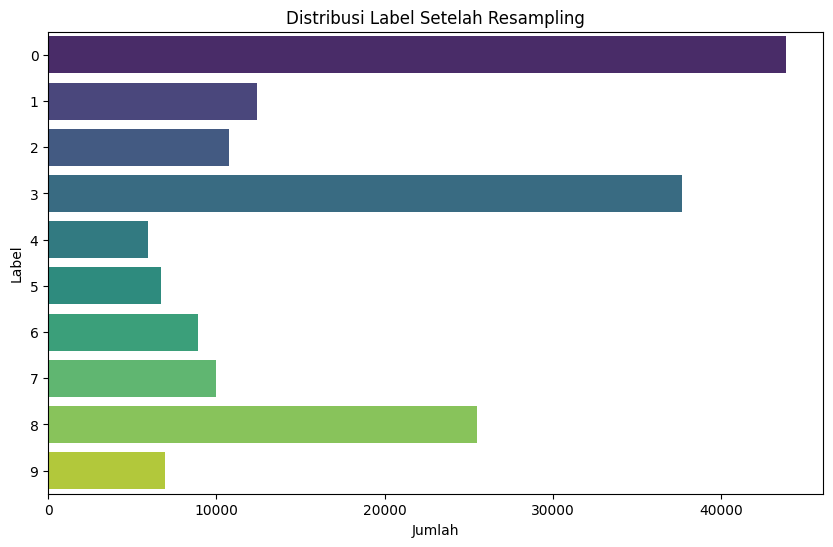

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y=y_resampled, palette="viridis")
plt.title("Distribusi Label Setelah Resampling")
plt.xlabel("Jumlah")
plt.ylabel("Label")
plt.show()


#TRAINING DATA TANPA CV

=== Logistic Regression ===
Training Accuracy: 0.7153462261967636
Testing Accuracy: 0.7221477658330719
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     11170
           1       0.65      0.53      0.59      3704
           2       0.38      0.34      0.36      2519
           3       0.98      0.98      0.98      8005
           4       0.09      0.04      0.06       393
           5       0.46      0.23      0.31      2102
           6       0.06      0.11      0.08       373
           7       0.02      0.91      0.05        33
           8       0.63      0.58      0.61      6558
           9       0.10      0.79      0.18       212

    accuracy                           0.72     35069
   macro avg       0.43      0.54      0.41     35069
weighted avg       0.76      0.72      0.74     35069



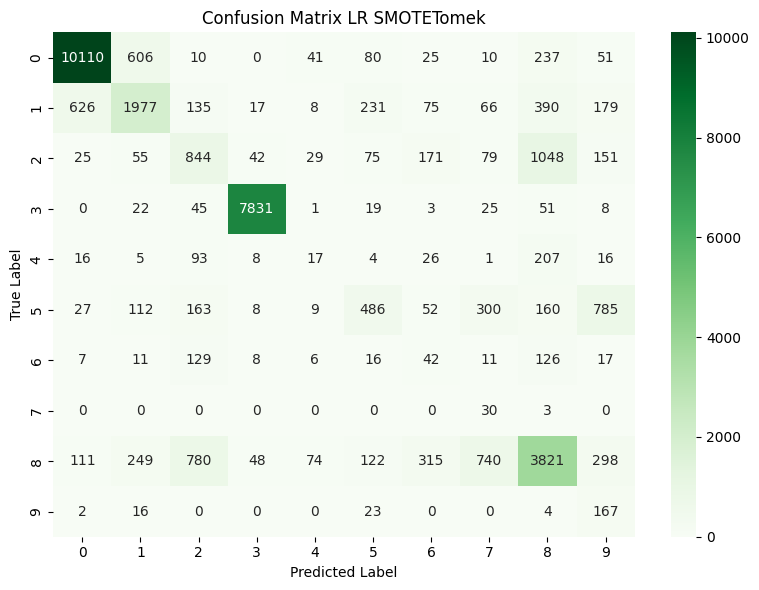

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR = LogisticRegression(max_iter=1000)
LR.fit(x_resampled, y_resampled)

y_train_predlr = LR.predict(x_resampled)
y_test_predlr = LR.predict(x_tst)

print("=== Logistic Regression ===")
print("Training Accuracy:", metrics.accuracy_score(y_resampled, y_train_predlr))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predlr))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predlr))
# Confusion Matrix
cmlr = metrics.confusion_matrix(y_tst, y_test_predlr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmlr, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix LR SMOTETomek")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Random Forest ===
Training Accuracy: 0.9999584611641555
Testing Accuracy: 0.8475576720180216
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     11170
           1       0.83      0.88      0.85      3704
           2       0.36      0.33      0.35      2519
           3       0.99      0.98      0.99      8005
           4       0.27      0.25      0.26       393
           5       0.80      0.74      0.77      2102
           6       0.25      0.19      0.22       373
           7       0.42      0.48      0.45        33
           8       0.71      0.76      0.74      6558
           9       0.54      0.82      0.65       212

    accuracy                           0.85     35069
   macro avg       0.62      0.64      0.63     35069
weighted avg       0.85      0.85      0.85     35069



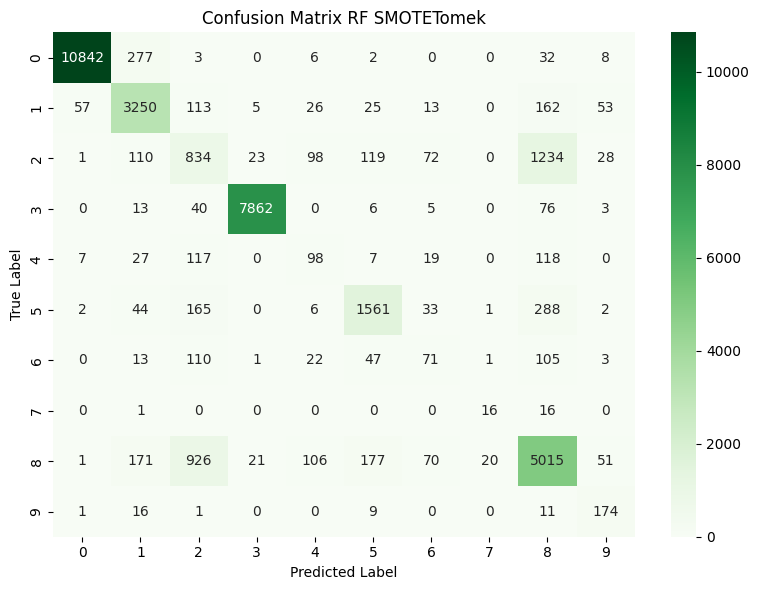

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RF = RandomForestClassifier()
RF.fit(x_resampled, y_resampled)

y_train_predrf = RF.predict(x_resampled)
y_test_predrf = RF.predict(x_tst)

print("=== Random Forest ===")
print("Training Accuracy:", metrics.accuracy_score(y_resampled, y_train_predrf))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predrf))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predrf))
# Confusion Matrix
cmrf = metrics.confusion_matrix(y_tst, y_test_predrf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix RF SMOTETomek")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Support Vector Classifier ===
Training Accuracy: 0.7639644664929948
Testing Accuracy: 0.7729903903732641
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     11170
           1       0.68      0.64      0.66      3704
           2       0.38      0.46      0.41      2519
           3       1.00      0.98      0.99      8005
           4       0.38      0.19      0.25       393
           5       0.61      0.55      0.58      2102
           6       0.10      0.09      0.09       373
           7       0.04      0.73      0.08        33
           8       0.69      0.64      0.66      6558
           9       0.16      0.69      0.27       212

    accuracy                           0.77     35069
   macro avg       0.50      0.59      0.49     35069
weighted avg       0.80      0.77      0.78     35069



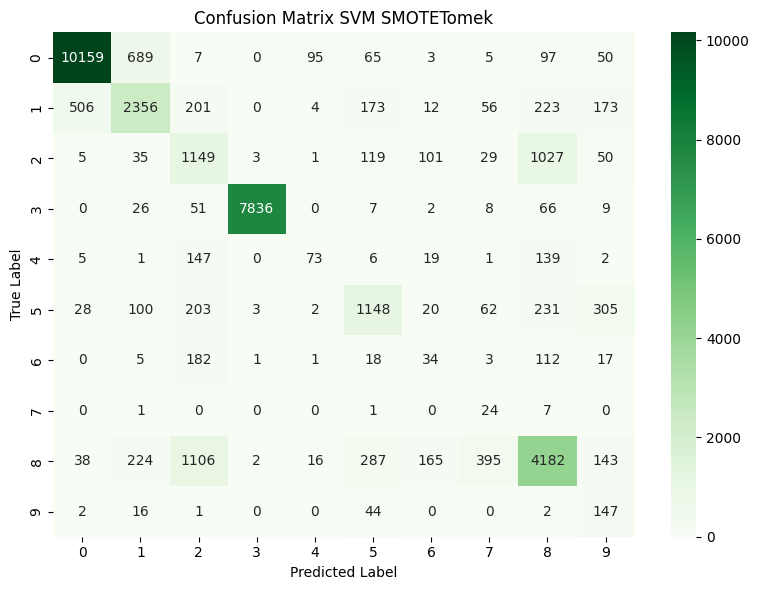

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

SVM = SVC()
SVM.fit(x_resampled, y_resampled)

y_train_predsv = SVM.predict(x_resampled)
y_test_predsv = SVM.predict(x_tst)

print("=== Support Vector Classifier ===")
print("Training Accuracy:", metrics.accuracy_score(y_resampled, y_train_predsv))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predsv))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predsv))
# Confusion Matrix
cmsv = metrics.confusion_matrix(y_tst, y_test_predsv)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmsv, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM SMOTETomek")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Naive Bayes ===
Training Accuracy: 0.530729837345787
Testing Accuracy: 0.45843907724771166
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.41      0.59     11170
           1       0.50      0.25      0.34      3704
           2       0.11      0.00      0.01      2519
           3       0.97      0.97      0.97      8005
           4       0.06      0.35      0.10       393
           5       0.18      0.05      0.07      2102
           6       0.05      0.51      0.09       373
           7       0.02      0.76      0.04        33
           8       0.35      0.31      0.33      6558
           9       0.03      0.98      0.06       212

    accuracy                           0.46     35069
   macro avg       0.33      0.46      0.26     35069
weighted avg       0.68      0.46      0.51     35069



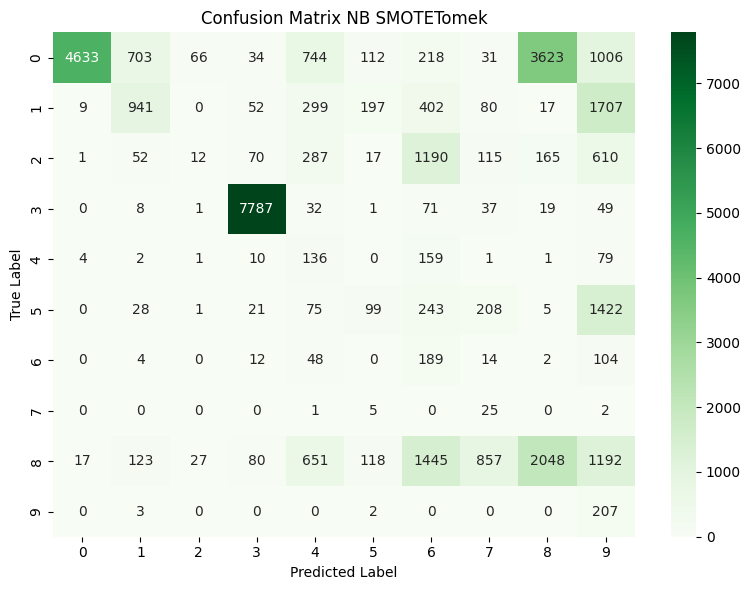

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NB = GaussianNB()
NB.fit(x_resampled, y_resampled)

y_train_prednb = NB.predict(x_resampled)
y_test_prednb = NB.predict(x_tst)

print("=== Naive Bayes ===")
print("Training Accuracy:", metrics.accuracy_score(y_resampled, y_train_prednb))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_prednb))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_prednb))
# Confusion Matrix
cmnb = metrics.confusion_matrix(y_tst, y_test_prednb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix NB SMOTETomek")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== K-Nearest Neighbors ===
Training Accuracy: 0.8925093610733635
Testing Accuracy: 0.7586187230887679
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     11170
           1       0.70      0.62      0.65      3704
           2       0.29      0.33      0.31      2519
           3       0.99      0.98      0.99      8005
           4       0.12      0.19      0.15       393
           5       0.68      0.47      0.56      2102
           6       0.06      0.12      0.08       373
           7       0.04      0.36      0.08        33
           8       0.66      0.60      0.63      6558
           9       0.14      0.39      0.20       212

    accuracy                           0.76     35069
   macro avg       0.46      0.50      0.46     35069
weighted avg       0.78      0.76      0.77     35069



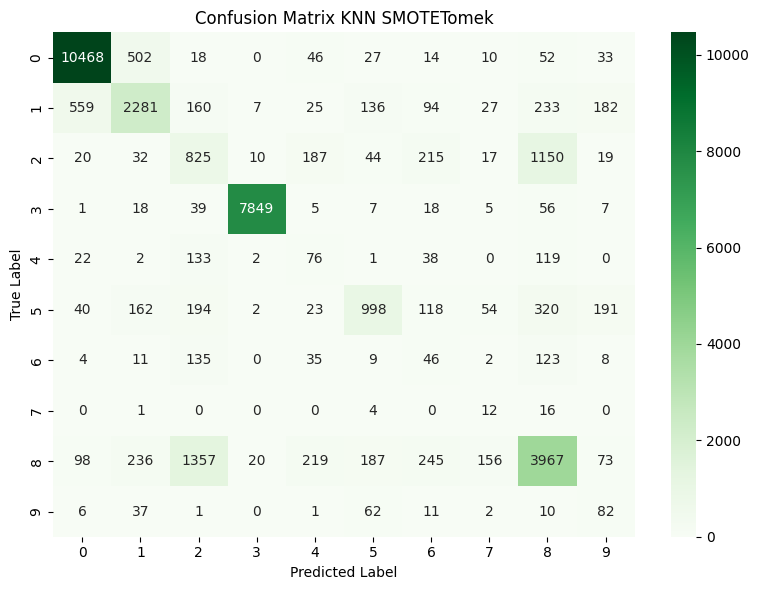

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN = KNeighborsClassifier()
KNN.fit(x_resampled, y_resampled)

y_train_predkn = KNN.predict(x_resampled)
y_test_predkn = KNN.predict(x_tst)

print("=== K-Nearest Neighbors ===")
print("Training Accuracy:", metrics.accuracy_score(y_resampled, y_train_predkn))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predkn))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predkn))
# Confusion Matrix
cmkn = metrics.confusion_matrix(y_tst, y_test_predkn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cmkn, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN SMOTETomek")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

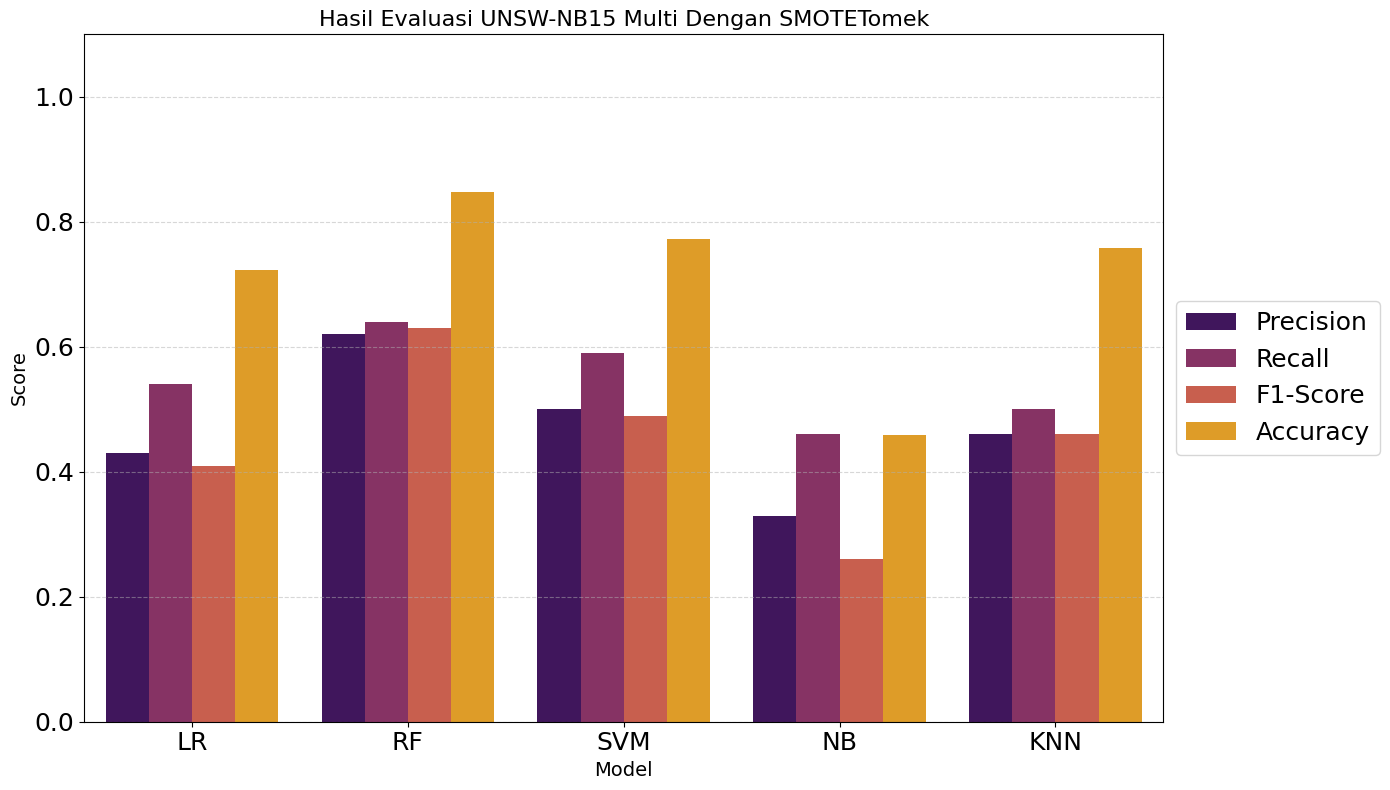

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
model_names = ["LR", "RF", "SVM", "NB", "KNN"]
# Update with actual macro averages from the outputs without GridSearchCV
macro_precision = [0.43, 0.62, 0.50, 0.33, 0.46]
macro_recall = [0.54, 0.64, 0.59, 0.46, 0.50]
macro_f1_score = [0.41, 0.63, 0.49, 0.26, 0.46]
# Update with actual testing accuracy from the outputs without GridSearchCV
test_accuracy = [0.7221, 0.8476, 0.7730, 0.4584, 0.7586]

# Buat DataFrame
df_all_metrics = pd.DataFrame({
    "Model": model_names * 4,
    "Score": macro_precision + macro_recall + macro_f1_score + test_accuracy,
    "Metric": ["Precision"] * len(model_names) + ["Recall"] * len(model_names) + ["F1-Score"] * len(model_names) + ["Accuracy"] * len(model_names)
})

# Buat palet dari colormap 'inferno'
palette = sns.color_palette("inferno", len(df_all_metrics['Metric'].unique()))

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_all_metrics, x="Model", y="Score", hue="Metric", palette=palette )
plt.title("Hasil Evaluasi UNSW-NB15 Multi Dengan SMOTETomek", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=18) # Increase x-axis label font size
plt.yticks(fontsize=18) # Increase y-axis label font size



plt.tight_layout()
plt.show()

#Menggunakan Gridsearch CV

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.7182
Training Accuracy: 0.7187
Testing Accuracy:  0.7260
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     11170
           1       0.65      0.53      0.58      3704
           2       0.38      0.33      0.35      2519
           3       0.98      0.98      0.98      8005
           4       0.10      0.05      0.07       393
           5       0.51      0.30      0.38      2102
           6       0.06      0.11      0.08       373
           7       0.02      0.91      0.05        33
           8       0.63      0.58      0.61      6558
           9       0.11      0.77      0.19       212

    accuracy                           0.73     35069
   macro avg       0.44      0.55      0.42     35069
weighted avg       0.77      0.73      0.74     35069

Confusion Matrix:
 [[10109   600    11     0    41    88    27    12   222    60

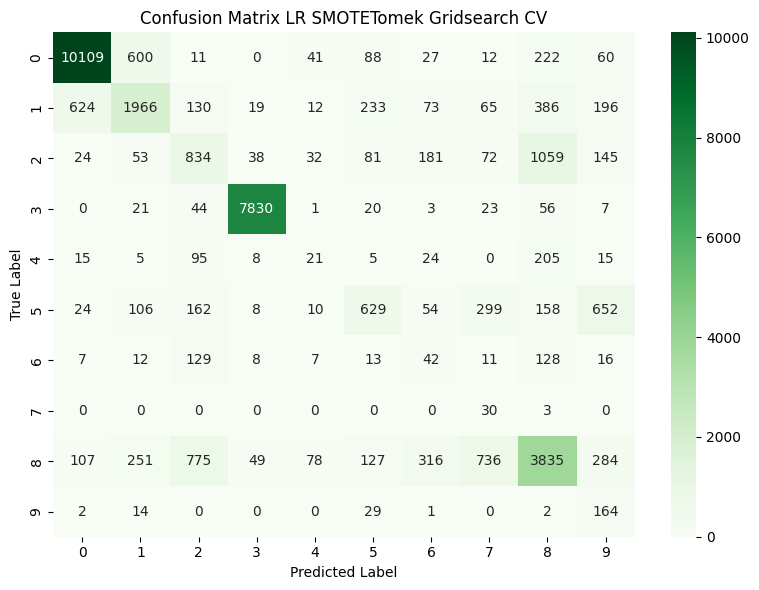

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


lr_model = LogisticRegression(max_iter=1000)
param_gridlr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(lr_model, param_gridlr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(x_resampled, y_resampled)

print("Best parameters:", grid_lr.best_params_)
print(f"Best CV score: {grid_lr.best_score_:.4f}")

# Evaluasi pada data training & testing
best_lr = grid_lr.best_estimator_
y_train_predlrm = best_lr.predict(x_resampled)
y_test_predlrm = best_lr.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_resampled, y_train_predlrm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predlrm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predlrm))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_tst, y_test_predlrm))
# Confusion Matrix
cmlrm = metrics.confusion_matrix(y_tst, y_test_predlrm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmlrm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix LR SMOTETomek Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Random Forest...
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.8732
Training Accuracy: 0.9164
Testing Accuracy:  0.8308
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     11170
           1       0.80      0.89      0.84      3704
           2       0.36      0.72      0.48      2519
           3       1.00      0.98      0.99      8005
           4       0.25      0.26      0.25       393
           5       0.85      0.78      0.81      2102
           6       0.43      0.19      0.27       373
           7       0.17      0.61      0.27        33
           8       0.81      0.57      0.67      6558
           9       0.47      0.85      0.61       212

    accuracy                           0.83     35069
   macro avg       0.61      0.68      0.62     35069
weighted avg       0.87      0.83 

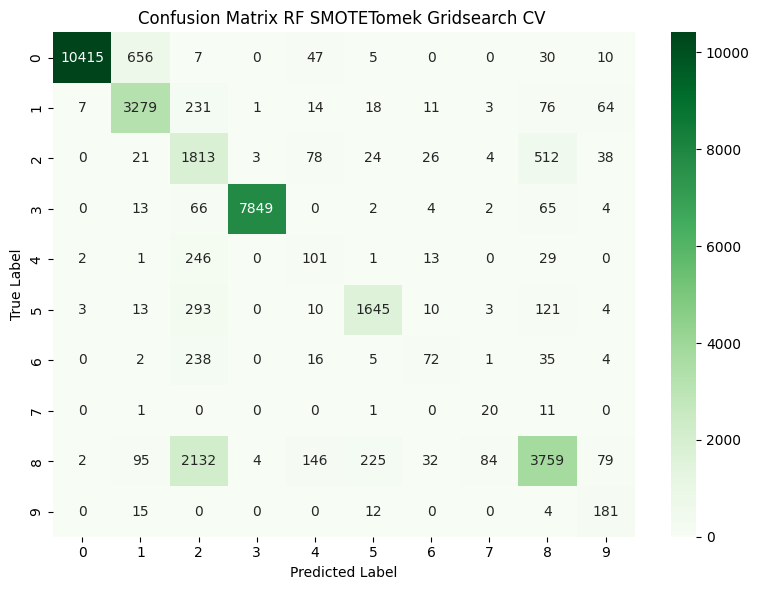

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Random Forest...")

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
param_gridrf = {
    'n_estimators': [100, 200],
    'max_depth': [20],
    'max_features': ['sqrt'],
    'min_samples_split': [2],
    'min_samples_leaf': [1]

}

grid_rf = GridSearchCV(rf_model, param_gridrf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_resampled, y_resampled)

print("Best parameters:", grid_rf.best_params_)
print(f"Best CV score: {grid_rf.best_score_:.4f}")

# Evaluasi pada data training & testing
best_rf = grid_rf.best_estimator_
y_train_predrfm = best_rf.predict(x_resampled)
y_test_predrfm = best_rf.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_resampled, y_train_predrfm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predrfm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predrfm))
# Confusion Matrix
cmrfm = metrics.confusion_matrix(y_tst, y_test_predrfm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmrfm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix RF SMOTETomek Gridsearch CV ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Support Vector Machine...


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV score: 0.7345
Training Accuracy: 0.7350
Testing Accuracy:  0.7657
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     11170
           1       0.66      0.57      0.61      3704
           2       0.35      0.04      0.06      2519
           3       1.00      0.98      0.99      8005
           4       0.33      0.01      0.01       393
           5       0.60      0.72      0.65      2102
           6       0.33      0.01      0.02       373
           7       0.04      0.85      0.08        33
           8       0.57      0.75      0.64      6558
           9       0.17      0.70      0.28       212

    accuracy                           0.77     35069
   macro avg       0.50      0.55      0.43     35069
weighted avg       0.77      0.77      0.75     35069



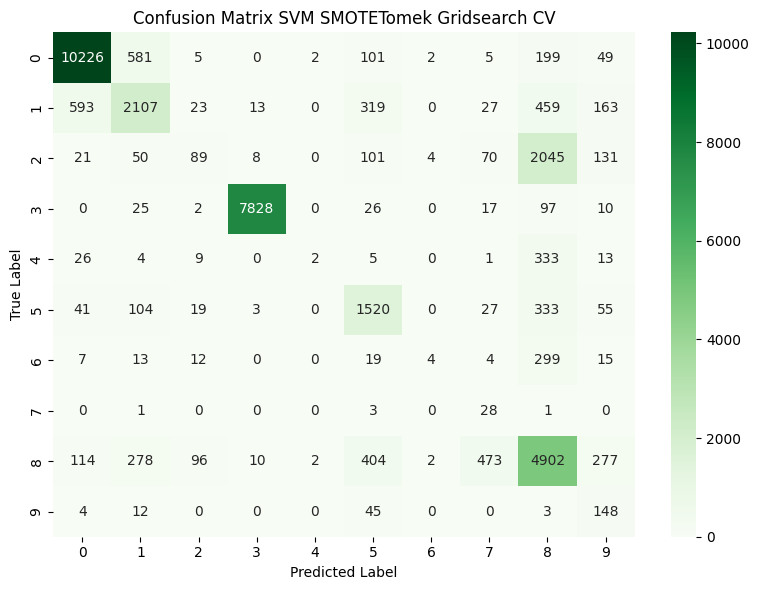

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Support Vector Machine...")

svm_model = SVC(max_iter=50000)
param_gridsvm = {
     'C': [0.1, 1],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
}

grid_svm = GridSearchCV(svm_model, param_gridsvm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(x_resampled, y_resampled)

print("Best parameters:", grid_svm.best_params_)
print(f"Best CV score: {grid_svm.best_score_:.4f}")

# Evaluasi pada data training & testing
best_svm = grid_svm.best_estimator_
y_train_predsvm = best_svm.predict(x_resampled)
y_test_predsvm = best_svm.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_resampled, y_train_predsvm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predsvm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predsvm))
# Confusion Matrix
cmsvm = metrics.confusion_matrix(y_tst, y_test_predsvm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmsvm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM SMOTETomek Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Naive Bayes...
Best parameters: {'var_smoothing': 1e-06}
Best CV score: 0.4978
Training Accuracy: 0.5084
Testing Accuracy:  0.5081
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.55      0.71     11170
           1       0.52      0.34      0.41      3704
           2       0.13      0.00      0.01      2519
           3       0.97      0.97      0.97      8005
           4       0.05      0.58      0.10       393
           5       0.26      0.06      0.10      2102
           6       0.04      0.23      0.07       373
           7       0.02      0.58      0.04        33
           8       0.45      0.29      0.36      6558
           9       0.03      0.98      0.06       212

    accuracy                           0.51     35069
   macro avg       0.35      0.46      0.28     35069
weighted avg       0.70      0.51      0.57     35069



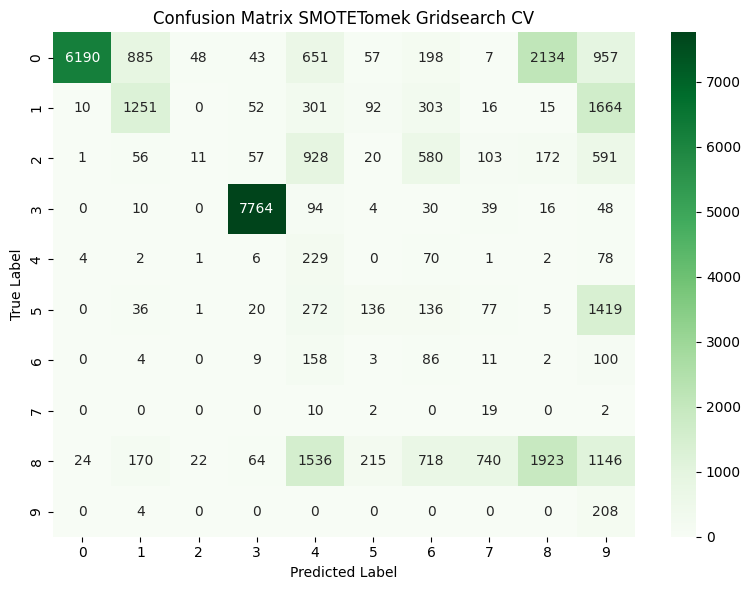

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Naive Bayes...")

nb_model = GaussianNB()
param_gridnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-7]
}

grid_nb = GridSearchCV(nb_model, param_gridnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(x_trn, y_trn)

print("Best parameters:", grid_nb.best_params_)
print(f"Best CV score: {grid_nb.best_score_:.4f}")

# Evaluasi pada data training & testing
best_nb = grid_nb.best_estimator_
y_train_prednbm = best_nb.predict(x_trn)
y_test_prednbm = best_nb.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_prednbm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_prednbm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_prednbm))
# Confusion Matrix
cmnbm = metrics.confusion_matrix(y_tst, y_test_prednbm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmnbm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SMOTETomek Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for K-Nearest Neighbors...
Best parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best CV score: 0.8091
Training Accuracy: 1.0000
Testing Accuracy:  0.8127
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     11170
           1       0.75      0.72      0.73      3704
           2       0.35      0.32      0.34      2519
           3       1.00      0.98      0.99      8005
           4       0.24      0.15      0.18       393
           5       0.62      0.69      0.65      2102
           6       0.09      0.06      0.07       373
           7       0.33      0.03      0.06        33
           8       0.69      0.75      0.72      6558
           9       0.48      0.21      0.30       212

    accuracy                           0.81     35069
   macro avg       0.55      0.49      0.50     35069
weighted avg       0.81      0.81      0.81     35069



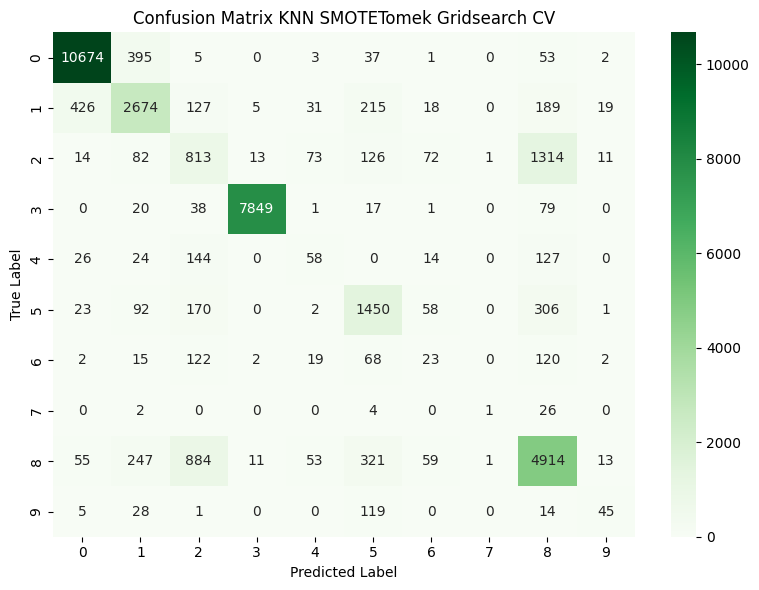

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for K-Nearest Neighbors...")

knn_model = KNeighborsClassifier()
param_gridknn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn_model, param_gridknn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(x_trn, y_trn)

print("Best parameters:", grid_knn.best_params_)
print(f"Best CV score: {grid_knn.best_score_:.4f}")

# Evaluasi pada data training & testing
best_knn = grid_knn.best_estimator_
y_train_predknn = best_knn.predict(x_trn)
y_test_predknn = best_knn.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predknn):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predknn):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predknn))
# Confusion Matrix
cmknn = metrics.confusion_matrix(y_tst, y_test_predknn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmknn, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN SMOTETomek Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

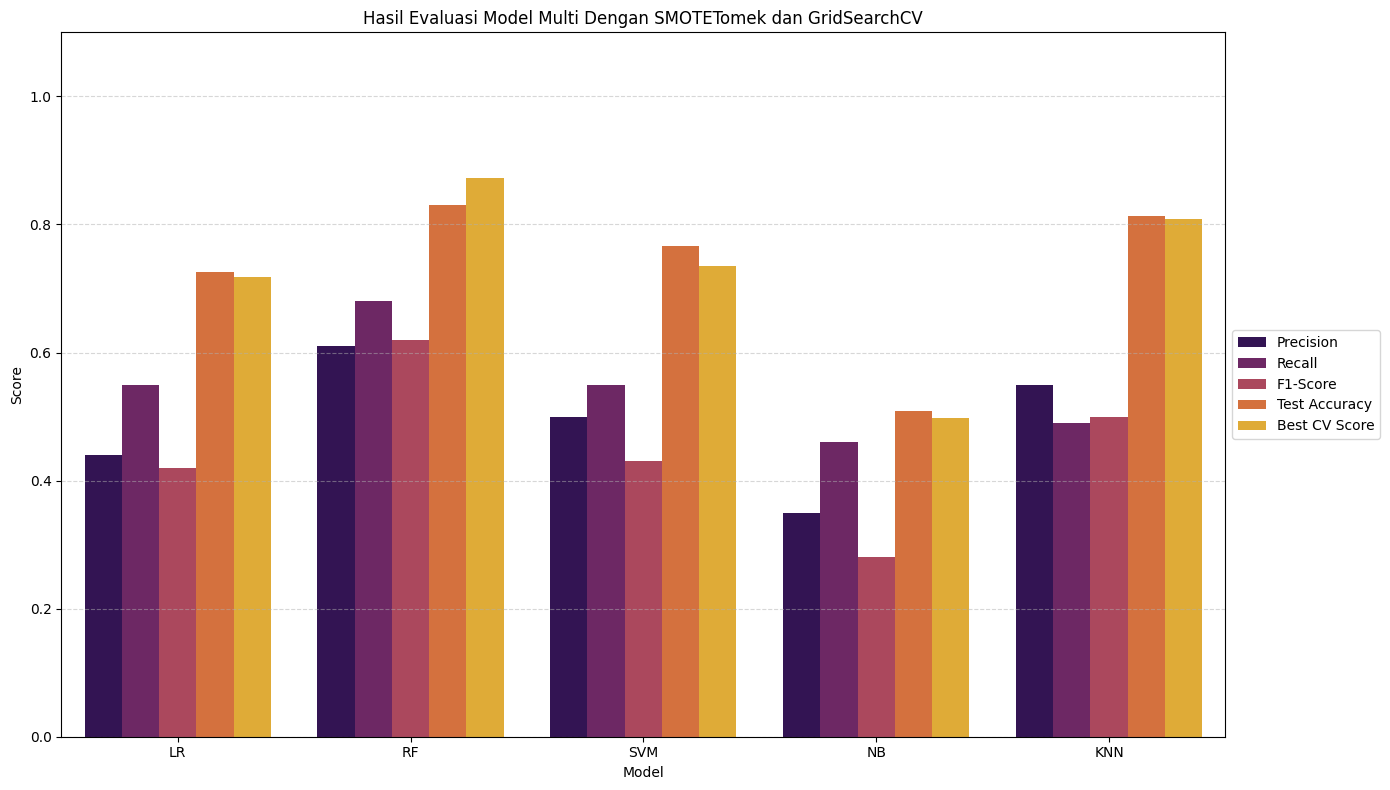

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data dari hasil GridSearchCV
model_names = ["LR", "RF", "SVM", "NB", "KNN"]

# Macro averages from Classification Reports (Testing Data after GridSearchCV)
macro_precision = [0.44, 0.61, 0.50, 0.35, 0.55]
macro_recall = [0.55, 0.68, 0.55, 0.46, 0.49]
macro_f1_score = [0.42, 0.62, 0.43, 0.28, 0.50]

# Test accuracies from GridSearchCV outputs
test_accuracies = [0.7260, 0.8308, 0.7657, 0.5081, 0.8127]

# Best CV scores from GridSearchCV outputs
best_cv_scores = [0.7182, 0.8732, 0.7345, 0.4978, 0.8091]


# Buat DataFrame
df_all_metrics = pd.DataFrame({
    "Model": model_names * 5,
    "Score": macro_precision + macro_recall + macro_f1_score + test_accuracies + best_cv_scores,
    "Metric": ["Precision"] * len(model_names) + ["Recall"] * len(model_names) + ["F1-Score"] * len(model_names) + ["Test Accuracy"] * len(model_names) + ["Best CV Score"] * len(model_names)
})

# Buat palet dari colormap 'inferno'
palette = sns.color_palette("inferno", len(df_all_metrics['Metric'].unique()))

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_all_metrics, x="Model", y="Score", hue="Metric", palette=palette )
plt.title("Hasil Evaluasi UNSW-NB15 Multi Dengan SMOTETomek", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=18) # Increase x-axis label font size
plt.yticks(fontsize=18) # Increase y-axis label font size



plt.tight_layout()
plt.show()

#Ekspor Impor Model


In [ ]:
# Ambil model terbaik dan prediksi
best_svm = grid_svm.best_estimator_
y_test_pred = best_svm.predict(x_tst)

KeyboardInterrupt: 

In [ ]:
best_lr = grid_lr.best_estimator_
y_test_pred = best_lr.predict(x_tst)

In [ ]:
best_rf = grid_rf.best_estimator_
y_test_pred = best_rf.predict(x_tst)

In [ ]:
best_nb = grid_nb.best_estimator_
y_test_pred = best_nb.predict(x_tst)

In [ ]:
best_knn = grid_knn.best_estimator_
y_test_pred = best_knn.predict(x_tst)

In [ ]:
import joblib
joblib.dump(best_svm, "SVM_CV.pkl")
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(best_lr, "LR_CV.pkl"  )
joblib.dump(best_rf, "RF_CV.pkl"  )
joblib.dump(best_nb, "NB_CV.pkl"  )
joblib.dump(best_knn, "KNN_CV.pkl"  )

In [ ]:
model_svm = joblib.load("SVM_CV.pkl")
scaler = joblib.load('scaler.pkl')
model_lr = joblib.load("LR_CV.pkl")

model_rf = joblib.load("RF_CV.pkl")
model_nb = joblib.load("NB_CV.pkl")
model_knn = joblib.load("KNN_CV.pkl")

#Load data Kdd_Test

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Dataset/UNSW_NB15_testing-set.csv")

#Bersihin Data

In [ ]:
c = len(test_data.select_dtypes(include=["number"]).columns)
c

In [ ]:
col = [
    'id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
    'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
    'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
    'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
    'ct_srv_dst', 'is_sm_ips_ports'
]


In [ ]:
for col in train_data.select_dtypes(include=["object"]):
    print(col)

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['proto','service','state','attack_cat']

for i in cols:
    en = LabelEncoder()

    train_data[i] = en.fit_transform(train_data[i])

In [ ]:
print("Kolom yang tersedia dalam dataset:")
print(train_data.columns.tolist())

columns_to_drop = [
    'id',  # ga ngaruh apa apa ke label
    'stime',      # sama
    'ltime',               # sama
    'is_sm_ips_ports',             # nol
    'sbytes',     # Korelasi hampir 0
    'dbytes',  # Korelasi hampir 0
    'attack_cat',    # pake label
]

ts_cleaned = train_data.drop(columns=columns_to_drop, errors='ignore')

print("\nKolom setelah dihapus:")
print(ts_cleaned.columns.tolist())

In [ ]:
Xs_trn = ts_cleaned.drop(['label'] , axis = 1).values


In [ ]:
print(Xs_trn.shape)
print(ts_cleaned.shape)


In [ ]:
ts_cleaned.head()

#Test Model Pada Data Baru



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_trn)
X_test_scaled = scaler.transform(Xs_trn)                # data test

# Kalau pakai label juga:
y_train = y_trn


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix


X_test = ts_cleaned.drop(columns=['label'])
y_test = ts_cleaned['label']

# Buat pipeline: Scaling -> LR
pipeline_lr = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

# Fit ke training data
pipeline_lr.fit(x_trn, y_trn)

# Prediksi di data test
y_pred = pipeline_lr.predict(X_test)

# Pastikan y_pred sama tipe dengan y_test
y_pred = [int(label) for label in y_pred]

# Lalu evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




In [ ]:
# Prediksi untuk seluruh test set
ts_cleaned['Prediction_lr'] = pipeline_lr.predict(X_test)

# Visualisasi pie chart distribusi prediksi
ts_cleaned['Prediction_lr'].value_counts().plot.pie(
    labels=["Normal", "Attack"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["LightGreen", "Tomato"]
)
plt.title("Prediksi Serangan vs Normal Logistic Regression")
plt.ylabel('')
plt.show()


In [ ]:
# Buat salinan bersih dari awal
ts_cleaned_clean = ts_cleaned.drop(columns=['label', 'Prediction_lr'], errors='ignore')
X_test = ts_cleaned_clean[x_trn.columns]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

x_trn = td_cleaned.drop(columns=['label'])
y_trn = td_cleaned['label']


X_test = ts_cleaned.drop(columns=['label'])
y_test = ts_cleaned['label']


# Buat pipeline: Scaling -> LR
pipeline_rf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# Fit ke training data
pipeline_rf.fit(x_trn, y_trn)

# Prediksi di data test
y_pred = pipeline_rf.predict(X_test)

# Pastikan y_pred sama tipe dengan y_test
y_pred = [int(label) for label in y_pred]


# Evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
# Prediksi untuk seluruh test set
ts_cleaned['Prediction_rf'] = pipeline_rf.predict(X_test)

# Visualisasi pie chart distribusi prediksi
ts_cleaned['Prediction_rf'].value_counts().plot.pie(
    labels=["Normal", "Attack"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["LightGreen", "Tomato"]
)
plt.title("Prediksi Serangan vs Normal Random Forest")
plt.ylabel('')
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Pisahkan fitur dan label
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten
X_test = X_test[X_train.columns]

# Buat pipeline: Scaling -> SVM
pipeline_svm = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Fit ke training data
pipeline_svm.fit(X_train, y_train)

# Prediksi di data test
y_pred = pipeline_svm.predict(X_test)

# Evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
# Prediksi untuk seluruh test set
ts_cleaned['Prediction_svm'] = pipeline_svm.predict(X_test)

# Visualisasi pie chart distribusi prediksi
ts_cleaned['Prediction_svm'].value_counts().plot.pie(
    labels=["Normal", "Attack"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["LightGreen", "Tomato"]
)
plt.title("Prediksi Serangan vs Normal Support Vector Machine")
plt.ylabel('')
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Pisahkan fitur dan label
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten
X_test = X_test[X_train.columns]

# Buat pipeline: Scaling -> SVM
pipeline_nb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Fit ke training data
pipeline_nb.fit(X_train, y_train)

# Prediksi di data test
y_pred = pipeline_nb.predict(X_test)

# Evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
# Prediksi untuk seluruh test set
ts_cleaned['Prediction_nb'] = pipeline_nb.predict(X_test)

# Visualisasi pie chart distribusi prediksi
ts_cleaned['Prediction_nb'].value_counts().plot.pie(
    labels=["Normal", "Attack"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["LightGreen", "Tomato"]
)
plt.title("Prediksi Serangan vs Normal Naive Bayes")
plt.ylabel('')
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Pisahkan fitur dan label
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten
X_test = X_test[X_train.columns]

# Buat pipeline: Scaling -> SVM
pipeline_knn = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Fit ke training data
pipeline_knn.fit(X_train, y_train)

# Prediksi di data test
y_pred = pipeline_knn.predict(X_test)

# Evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
# Prediksi untuk seluruh test set
ts_cleaned['Prediction_knn'] = pipeline_knn.predict(X_test)

# Visualisasi pie chart distribusi prediksi
ts_cleaned['Prediction_knn'].value_counts().plot.pie(
    labels=["Normal", "Attack"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["LightGreen", "tomato"]
)
plt.title("Prediksi Serangan vs Normal KNN")
plt.ylabel('')
plt.show()


In [ ]:
import pandas as pd

def predict_realtime_lr():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_lr.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

predict_realtime_lr()

In [ ]:
import pandas as pd

def predict_realtime_dt():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_dt.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

predict_realtime_dt()

In [ ]:
import pandas as pd

def predict_realtime_rf():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_rf.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

predict_realtime_rf()

In [ ]:
import pandas as pd

def predict_realtime_svm():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_svm.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

predict_realtime_svm()

In [ ]:
import pandas as pd

def predict_realtime_nb():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_nb.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

predict_realtime_nb()

In [ ]:
import pandas as pd

def predict_realtime_knn():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_knn.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

predict_realtime_knn()